In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
#from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("mnist_train.csv")

In [3]:
df.shape

(60000, 785)

In [4]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [8]:
# To convert our data frame to numpy array to perform actions
data = df.values

In [9]:
print(type(data))

<class 'numpy.ndarray'>


In [12]:
x = data[:,1:]
y = data[:,0]

print(x.shape)
print(y.shape)

(60000, 784)
(60000,)


In [13]:
print(x)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [14]:
print(y)

[5 0 4 ..., 5 6 8]


In [16]:
img = x[3].reshape(28,28)
print(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

1


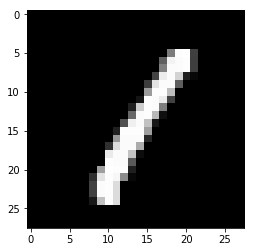

In [19]:
plt.imshow(img,cmap = "gray")
print(y[3])
plt.show()

In [26]:
# dividing data set to training and testing sets
# spliting 80% data to training 

split = int(0.80*x.shape[0])
print(split)
x_train , y_train = x[:split,:] , y[:split]
print(x_train.shape,y_train.shape)

x_test , y_test = x[split:,:] , y[split:]
print(x_test.shape,y_test.shape)

48000
(48000, 784) (48000,)
(12000, 784) (12000,)


## Scikit split

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
XT,Xt,YT,Yt = train_test_split(x,y)

In [33]:
print(XT.shape,YT.shape)
print(Xt.shape,Yt.shape)

(45000, 784) (45000,)
(15000, 784) (15000,)


In [34]:
XT,Xt,YT,Yt = train_test_split(x,y,train_size = 0.20,random_state=5)

C:\Users\GAURAV\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [35]:
print(XT.shape,YT.shape)
print(Xt.shape,Yt.shape)

(12000, 784) (12000,)
(48000, 784) (48000,)


# Movie DataSet

In [75]:
df = pd.read_csv("movie_metadata.csv")
df.head()

,movie_title,director_name,color,duration,actor_1_name,language,country,title_year
0,Avatar,James Cameron,Color,178.0,CCH Pounder,English,USA,2009.0
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Color,169.0,Johnny Depp,English,USA,2007.0
2,Spectre,Sam Mendes,Color,148.0,Christoph Waltz,English,UK,2015.0
3,The Dark Knight Rises,Christopher Nolan,Color,164.0,Tom Hardy,English,USA,2012.0
4,Star Wars: Episode VII - The Force Awakens,JJ Abrams,Color,136.0,Harrison Ford,English,USA,2015.0


In [76]:
df.columns

Index(['movie_title', 'director_name', 'color', 'duration', 'actor_1_name',
       'language', 'country', 'title_year'],
      dtype='object')

In [77]:
score = df.get('duration')

In [78]:
score

0       178.0
1       169.0
2       148.0
3       164.0
4       136.0
5       132.0
6       156.0
7       100.0
8       141.0
9       153.0
10      183.0
11      169.0
12      106.0
13      151.0
14      150.0
15      143.0
16      150.0
17      173.0
18      136.0
19      106.0
20      164.0
21      153.0
22      156.0
23      186.0
24      113.0
25      201.0
26      194.0
27      147.0
28      131.0
29      124.0
        ...  
4902     81.0
4903    106.0
4904     77.0
4905    114.0
4906     84.0
4907     87.0
4908     80.0
4909    100.0
4910     82.0
4911     82.0
4912     70.0
4913     75.0
4914     87.0
4915     87.0
4916     98.0
4917     83.0
4918     99.0
4919     98.0
4920     93.0
4921      NaN
4922    111.0
4923     47.0
4924     92.0
4925     97.0
4926     81.0
4927     83.0
4928     96.0
4929     90.0
4930     90.0
4931     95.0
Name: duration, Length: 4932, dtype: float64

In [73]:
len(score)

4932

In [79]:
type(df)

pandas.core.frame.DataFrame

In [80]:
data = df.values

In [81]:
print(data.shape)

(4932, 8)


In [82]:
print(type(data))

<class 'numpy.ndarray'>


In [83]:
titles = df.get("movie_title")

In [89]:
freq_title = {}

for t in titles:
    lengths = len(t)
    try:
        freq_title[lengths] += 1
        
    except:
        freq_title[lengths] = 1
        
print(freq_title)

{6: 140, 40: 15, 7: 229, 21: 128, 42: 9, 11: 332, 12: 308, 23: 74, 38: 10, 34: 30, 16: 240, 17: 211, 15: 260, 43: 9, 14: 278, 41: 13, 22: 95, 10: 337, 35: 18, 18: 202, 9: 299, 26: 66, 19: 173, 31: 37, 25: 65, 24: 76, 13: 281, 20: 125, 30: 43, 50: 5, 5: 144, 4: 92, 2: 8, 8: 272, 37: 20, 27: 47, 28: 53, 33: 28, 56: 1, 46: 4, 3: 35, 36: 16, 47: 3, 45: 6, 39: 13, 54: 2, 44: 4, 48: 4, 49: 3, 29: 34, 32: 17, 1: 5, 58: 2, 55: 1, 83: 1, 53: 2, 86: 1, 52: 2, 71: 1, 68: 1, 79: 1, 66: 1}


In [90]:
x = freq_title.keys()
y = freq_title.values()


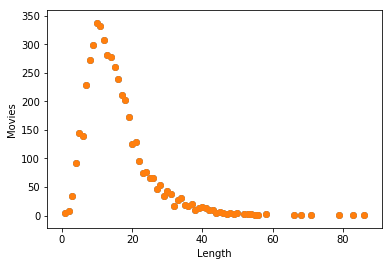

In [94]:
plt.scatter(x,y)
plt.xlabel("Length")
plt.ylabel("Movies")
plt.show()

# KNN Algorithm

In [3]:
dfx = pd.read_csv("xdata.csv")
dfy = pd.read_csv("ydata.csv")

In [5]:
X = dfx.values
Y = dfy.values

X = X[:,1:]
Y = Y[:,1:].reshape(-1,)

#print(X)

print(X.shape)
print(Y.shape)

#print(Y)

(399, 2)
(399,)


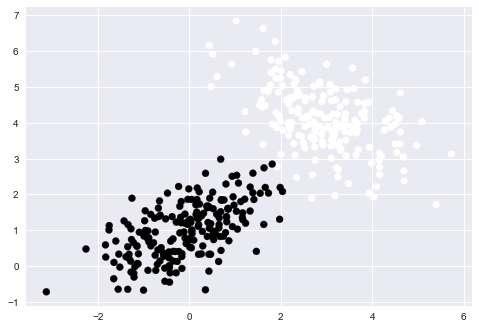

In [5]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

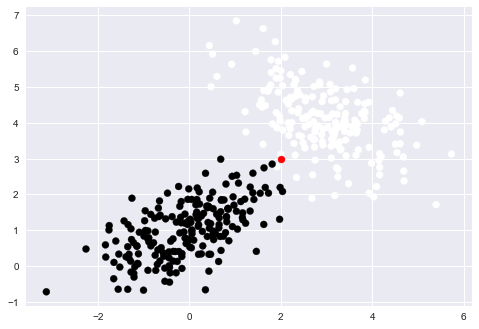

In [6]:
query_x = np.array([2,3])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

In [63]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals =[]
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    new_vals = np.unique(vals[:,1],return_counts = True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [64]:
x = knn(X,Y,query_x)
print(x)

NameError: name 'query_x' is not defined

# Handwritten Digits Recognization On MNIST Datasets Using KNN

In [2]:
df = pd.read_csv("MNST_train.csv")
print(df.shape)

(4380, 785)


In [3]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data = df.values
print(df.shape)
print(type(data))

(4380, 785)
<class 'numpy.ndarray'>


In [6]:
X = data[:,1:]
Y = data[:,0]

print(X.shape,Y.shape)

(4380, 784) (4380,)


In [7]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

3504
(3504, 784) (3504,)
(876, 784) (876,)


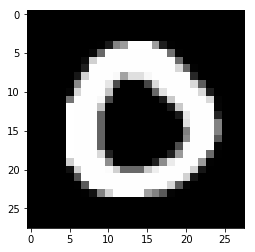

In [8]:
def DrawImg(sample):
    img = sample.reshape(28,28)
    plt.imshow(img,cmap='gray')
    plt.show()
DrawImg(X_train[4])

In [9]:
# KNN

def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals =[]
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    new_vals = np.unique(vals[:,1],return_counts = True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [10]:
# Prediction

pred = knn(X_train,Y_train,X_test[3])

print(int(pred))

(array([ 3.]), array([5], dtype=int64))
3


In [12]:
acc = score(data, pred)
print(acc)

NameError: name 'score' is not defined

In [ ]:
DrawImg(X_test[3])
print(Y_test[3])